# data_breast_cancer

In [96]:
from sklearn import datasets

data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Podziel ww. zbiór na uczący i testujący w proprcjach 80:20.

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer['data'], data_breast_cancer['target'],
                                                    test_size=.2)

In [98]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [99]:
from sklearn.metrics import f1_score

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)
print(f1_score(y_train, y_pred_train))

0.9759450171821306


Znajdź odpowiednią głębokośc drzewa decyzyjnego, tak aby osiągnąć maksymalną wartość f1
(uwaga: sprawdź dla zbioru uczącego i testowego).

In [100]:
out = []
for i in range(1, 20):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train, y_train)
    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)
    out.append((f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test), i))
out

[(0.9384885764499122, 0.9051094890510949, 1),
 (0.9611307420494699, 0.9411764705882353, 2),
 (0.9759450171821306, 0.9558823529411765, 3),
 (0.9895833333333334, 0.955223880597015, 4),
 (0.9930795847750865, 0.955223880597015, 5),
 (0.9982728842832469, 0.9635036496350365, 6),
 (1.0, 0.9635036496350365, 7),
 (1.0, 0.9489051094890512, 8),
 (1.0, 0.9489051094890512, 9),
 (1.0, 0.9635036496350365, 10),
 (1.0, 0.9481481481481482, 11),
 (1.0, 0.9558823529411765, 12),
 (1.0, 0.9705882352941176, 13),
 (1.0, 0.9558823529411765, 14),
 (1.0, 0.9635036496350365, 15),
 (1.0, 0.9481481481481482, 16),
 (1.0, 0.9705882352941176, 17),
 (1.0, 0.955223880597015, 18),
 (1.0, 0.9781021897810219, 19)]

In [101]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

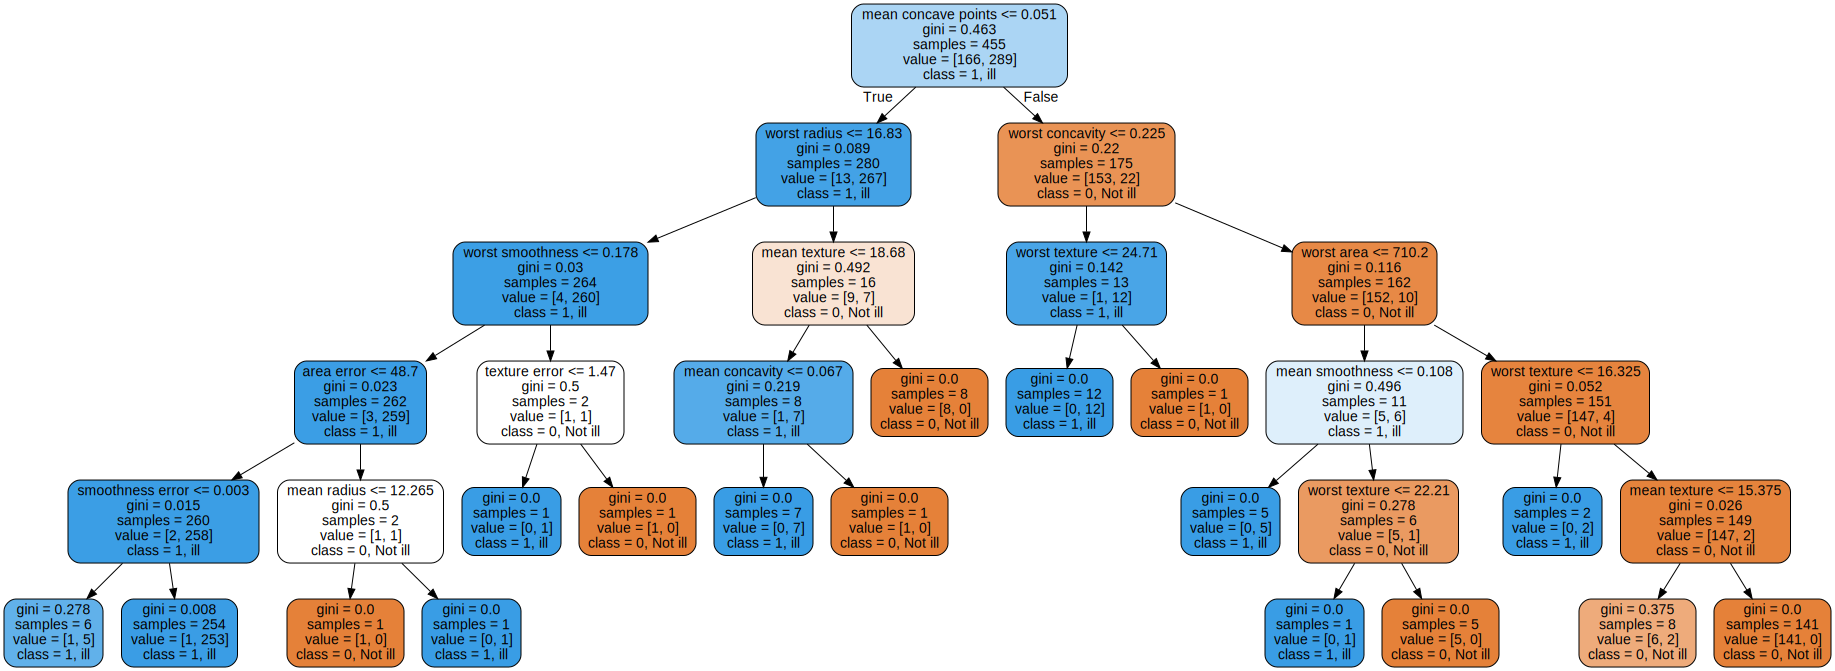

In [102]:
import graphviz
from sklearn.tree import export_graphviz

graph_str = export_graphviz(tree_clf, feature_names=data_breast_cancer['feature_names'],
                            class_names=["0, Not ill", "1, ill"],
                            rounded=True,
                            filled=True,
                            )
graph = graphviz.Source(graph_str)
graph

Wygenruj rysunek drzewa decyzyjnego w pliku bc.png.

In [103]:
import os

with open("bc.dot", 'w') as f:
    export_graphviz(tree_clf, out_file=f, rounded=True, filled=True)
    f.close()
    graphviz.render('dot', 'png', filepath="bc.dot")

try:
    os.rename("bc.dot.png", "bc.png")
except:
    print("error when renaming")


error when renaming


Zapisz w pliku Pickle f1acc_tree.pkl listę zawierającą: głebokość drzewa, f1 dla zbioru
uczącego, f1 dla zbioru testowego, dokładność (accuracy) dla zbioru uczącego, dokładność
(accuracy) dla zbioru testowego

In [104]:
import pickle

out = [tree_clf.get_depth(), f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test),
       tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)]

with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(obj=out, file=f)

with open('f1acc_tree.pkl', 'rb') as f:
    print(pickle.load(f))

[5, 0.9930795847750865, 0.9411764705882353, 0.9912087912087912, 0.9298245614035088]


# funkcja

<AxesSubplot:xlabel='x', ylabel='y'>

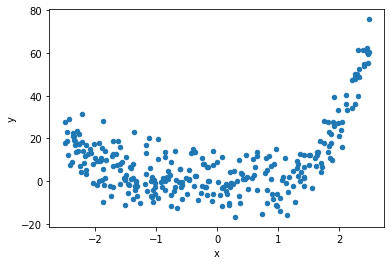

In [105]:
import numpy as np
import pandas as pd

size = 300
X = np.random.rand(size) * 5 - 2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4 * (X ** 4) + w3 * (X ** 3) + w2 * (X ** 2) + w1 * X + w0 + np.random.randn(size) * 8 - 4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x', y='y')

Podziel w/w zbiór na uczący i testujący w proprcjach 80/20.

In [106]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(df[['x']], df[['y']], test_size=.2, random_state=5)

Znajdź odpowiednią głębokośc drzewa decyzyjnego, tak aby wartość błędu średniokwadratowego (MSE), zarówno dla zbioru uczącego i testującego, były jak najmniejsze (uwaga naoverfitting).

In [107]:
from sklearn.metrics import mean_squared_error

test = []
for i in range(1, 40):
    tree_reg = DecisionTreeRegressor(max_depth=i)
    tree_reg.fit(X_train, y_train)
    y_train_pred = tree_reg.predict(X_train)
    y_test_pred = tree_reg.predict(X_test)
    test.append((mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), i))

test

[(106.54041313882571, 99.28216164204068, 1),
 (70.39615067650683, 93.24190967889992, 2),
 (57.15445596679649, 73.60247080850893, 3),
 (49.04390006951585, 73.88731713746712, 4),
 (44.71470204924762, 67.25751724167519, 5),
 (40.9460559536677, 76.51744028838233, 6),
 (35.955762640845045, 86.38838600083935, 7),
 (32.4167288556083, 92.41800206344132, 8),
 (30.080319527757524, 100.7350287899003, 9),
 (27.182851340446124, 101.88026134159402, 10),
 (22.14636972183643, 119.61500119075416, 11),
 (19.682518197628067, 123.59686985384384, 12),
 (16.2645689977498, 123.6475572922283, 13),
 (13.644330731572555, 126.4864706664973, 14),
 (11.404429249341687, 129.43047513739023, 15),
 (8.297700137898854, 135.27456393929927, 16),
 (6.387300248807955, 139.95341223568727, 17),
 (3.796496975671008, 144.35314288225774, 18),
 (2.9197128985921967, 145.30410776751407, 19),
 (2.0617677760724096, 145.0497762718015, 20),
 (1.6567033780790117, 145.29444935985302, 21),
 (1.2526215706291193, 144.79265466514298, 22),
 

In [108]:
tree_reg = DecisionTreeRegressor(max_depth=4)  #taka wartosc zostaje wybrana na podstawie testu wyzej
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

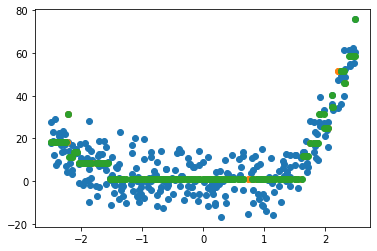

In [109]:
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y)
plt.scatter(X_test, y_test_pred)
plt.scatter(X_train, y_train_pred)

 Wygenruj rysunek drzewa decyzyjnego w pliku reg.png.

In [110]:
import os

with open("reg.dot", 'w') as f:
    export_graphviz(tree_reg, out_file=f, rounded=True, filled=True)
    f.close()
graphviz.render('dot', 'png', filepath="reg.dot")
try:
    os.rename("reg.dot.png", "reg.png")
except:
    print("error when renaming")


error when renaming


Zapisz w pliku Pickle mse_tree.pkl listę zawierającą: głebokość drzewa, MSE dla zbioru
uczącego, MSE dla zbioru testowego

In [111]:
out = [tree_reg.get_depth(),  #głebokość drzewa
       mean_squared_error(y_train, y_train_pred),  #MSE dla zbioru uczącego
       mean_squared_error(y_test, y_test_pred)]  #MSE dla zbioru testowego

with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(obj=out, file=f)

with open('mse_tree.pkl', 'rb') as f:
    print(pickle.load(f))

[4, 49.04390006951585, 73.88731713746712]
